In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
from scipy.stats import norm
from numpy import linspace, sqrt, pi
from os.path import join

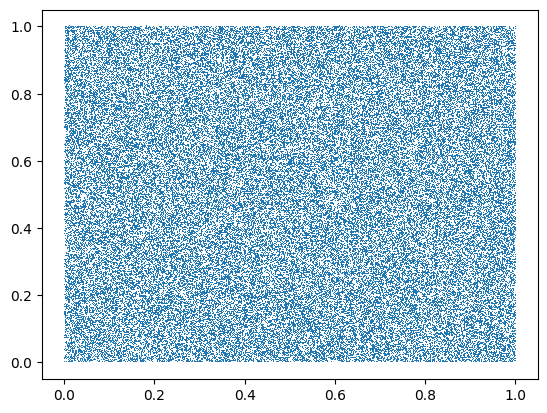

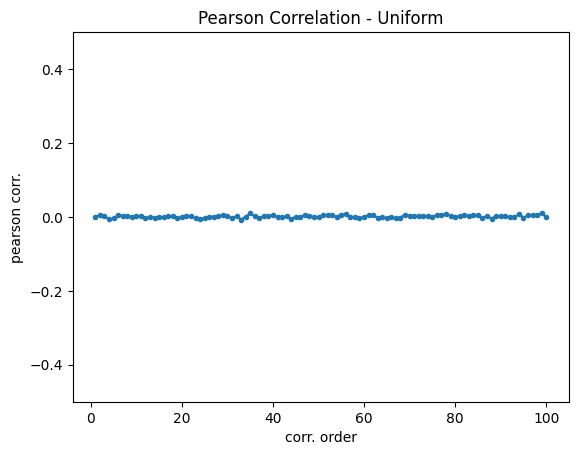

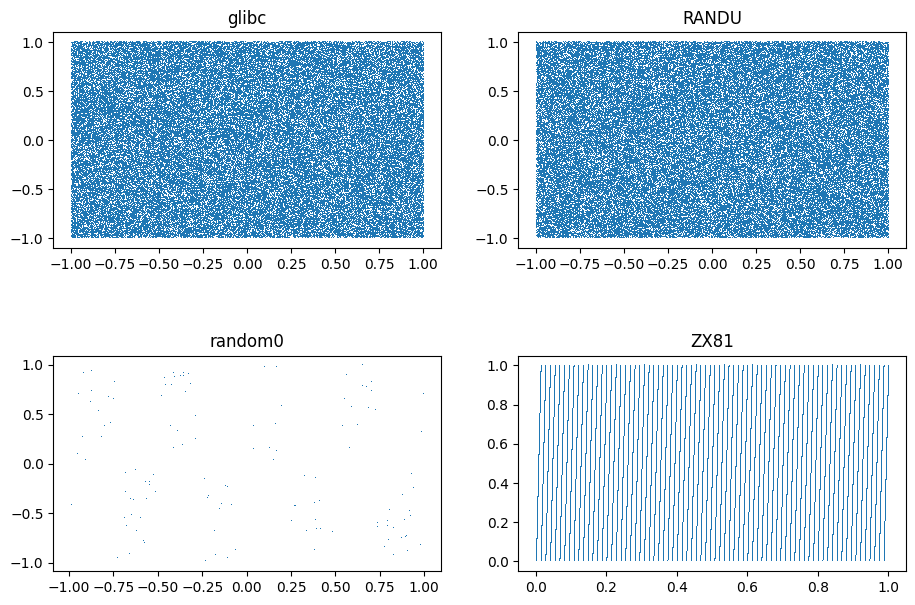

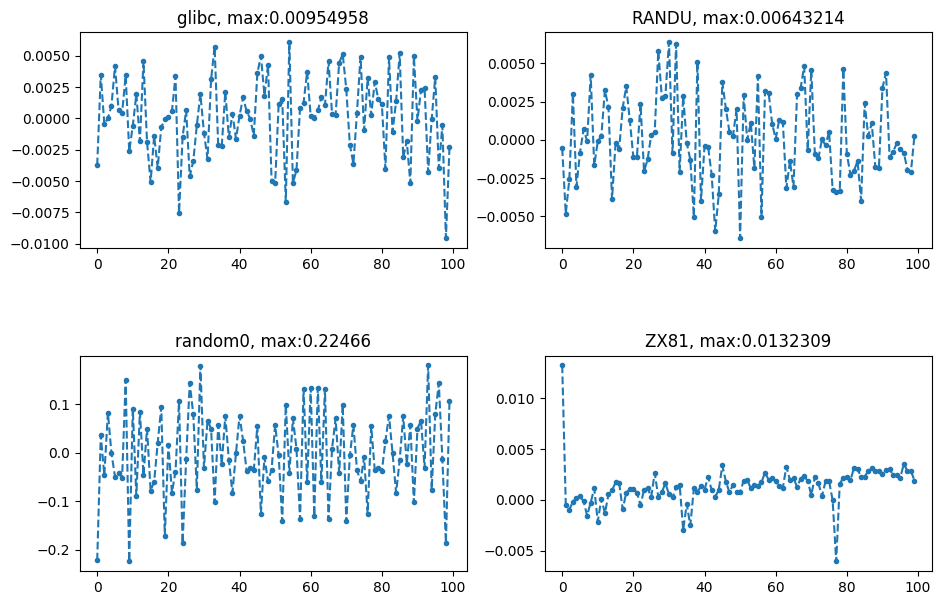

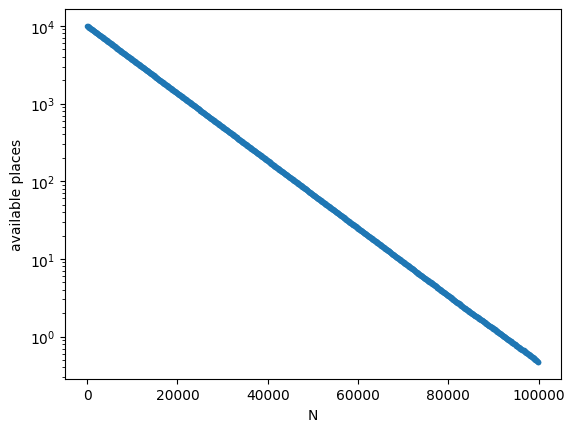

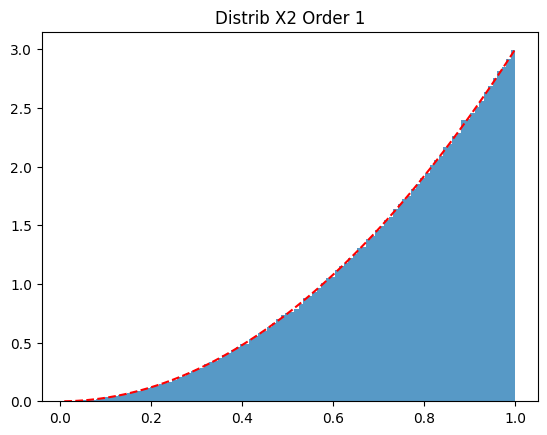

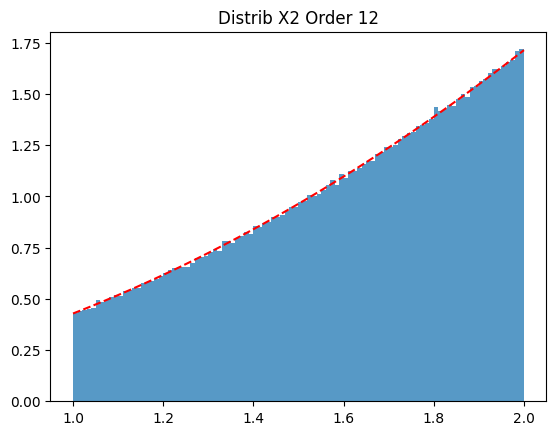

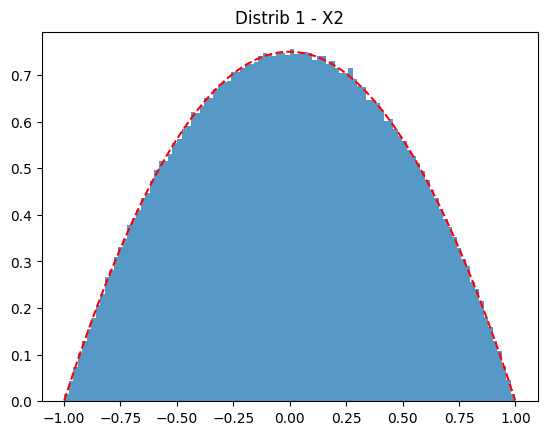

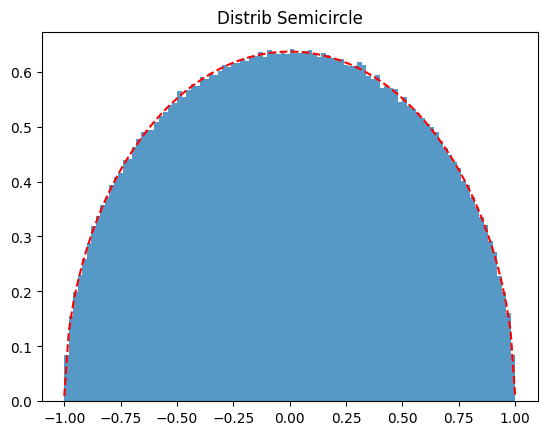

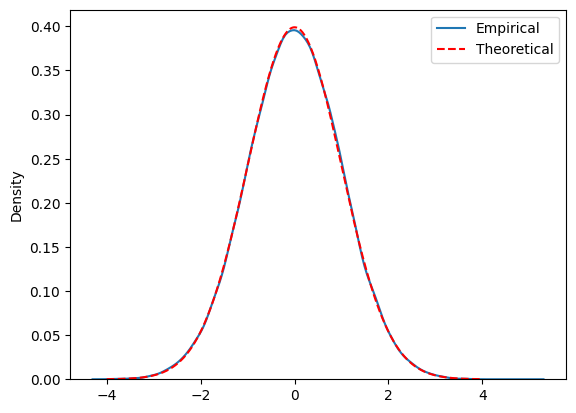

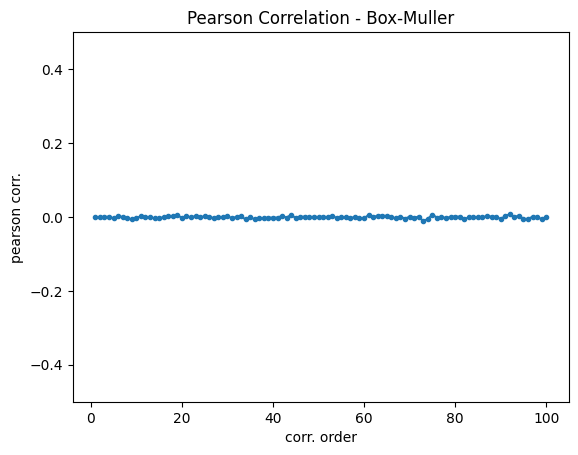

In [16]:
# Define the path for output files
output_dir = "../output/"

# Helper function to load data
def load_data(file_name):
    return np.loadtxt(join("../output", file_name), unpack=True)

# 1. Return-map of uniformly generated numbers
def plot_return_map():
    x = load_data("return-map.txt")
    plt.figure()
    plt.plot(x[1:], x[:-1], ',')
    #plt.title("Return-map of uniformly generated numbers (mersenne twister, N=100000)")
    plt.savefig(join(output_dir, "return_map.png"))
    plt.show()
    plt.close()

# 2. Pearson correlation plot
def plot_pearson_corr(file_name, suffix):
    c, p = load_data(file_name)
    plt.figure()
    plt.plot(c, p, ".-")
    plt.xlabel("corr. order")
    plt.ylabel("pearson corr.")
    plt.ylim(-0.5, 0.5)
    plt.title(f"Pearson Correlation - {suffix}")
    plt.savefig(join(output_dir, f"pearson_{suffix}.png"))
    plt.show()
    plt.close()

# 3. Multiple PRNG subplots
def plot_prng_subplots():
    arr1 = load_data("glibc.txt")
    arr2 = load_data("randu.txt")
    arr3 = load_data("random0.txt")
    arr4 = load_data("zx81.txt")

    fig = plt.figure(figsize=(11, 7))
    grid = GridSpec(2, 2, wspace=0.2, hspace=0.5)

    ax1 = fig.add_subplot(grid[0, 0])
    ax2 = fig.add_subplot(grid[0, 1])
    ax3 = fig.add_subplot(grid[1, 0])
    ax4 = fig.add_subplot(grid[1, 1])

    ax1.plot(arr1[:-1], arr1[1:], ",")
    ax2.plot(arr2[:-1], arr2[1:], ",")
    ax3.plot(arr3[:-1], arr3[1:], ",")
    ax4.plot(arr4[:-1], arr4[1:], ",")

    ax1.set_title('glibc')
    ax2.set_title('RANDU')
    ax3.set_title('random0')
    ax4.set_title('ZX81')

    plt.savefig(join(output_dir, "prng_subplots.png"))
    plt.show()
    plt.close()

# 4. LCG Pearson correlation subplots
def plot_lcg_pearson():
    c, p1, p2, p3, p4 = load_data("lcg_pearson.txt")
    fig = plt.figure(figsize=(11, 7))
    grid = GridSpec(2, 2, wspace=0.2, hspace=0.5)

    ax1 = fig.add_subplot(grid[0, 0])
    ax2 = fig.add_subplot(grid[0, 1])
    ax3 = fig.add_subplot(grid[1, 0])
    ax4 = fig.add_subplot(grid[1, 1])

    ax1.plot(p1, ".--")
    ax2.plot(p2, ".--")
    ax3.plot(p3, ".--")
    ax4.plot(p4, ".--")

    ax1.set_title(f'glibc, max:{max(abs(p1))}')
    ax2.set_title(f'RANDU, max:{max(abs(p2))}')
    ax3.set_title(f'random0, max:{max(abs(p3))}')
    ax4.set_title(f'ZX81, max:{max(abs(p4))}')

    plt.savefig(join(output_dir, "lcg_pearson.png"))
    plt.show()
    plt.close()

# 5. Exponential distribution semilogy plot
def plot_exponential():
    n, a = load_data("exponential.txt")
    plt.figure()
    plt.semilogy(n, a, ".")
    plt.xlabel("N")
    plt.ylabel("available places")
    plt.savefig(join(output_dir, "exponential.png"))
    plt.show()
    plt.close()

# 6. Distribution plots
def plot_distribution(file_name, func, title):
    y = load_data(file_name)
    plt.figure()
    plt.hist(y, bins=100, density=True, alpha=0.75)
    b = np.linspace(min(y), max(y), 100)
    plt.plot(b, func(b), 'r--')
    plt.title(title)
    plt.savefig(join(output_dir, f"distribution_{file_name}.png"))
    plt.show()
    plt.close()

# 7. Kernel Density Estimation vs. Theoretical Normal Distribution
def plot_kde_vs_theoretical():
    arr = load_data("box_muller.txt")
    plt.figure()
    sns.kdeplot(arr, label='Empirical')
    x = linspace(-4, 4, 1000)
    y = norm.pdf(x, 0, 1)
    plt.plot(x, y, "r--", label='Theoretical')
    plt.legend()
    plt.savefig(join(output_dir, "kde_vs_theoretical.png"))
    plt.show()
    plt.close()

# Call each function to generate the plots
plot_return_map()
plot_pearson_corr("pearson.txt", "Uniform")
plot_prng_subplots()
plot_lcg_pearson()
plot_exponential()
plot_distribution("distrib_x2_01.txt", lambda b: 3 * b**2, "Distrib X2 Order 1")
plot_distribution("distrib_x2_12.txt", lambda b: 3 / 7 * b**2, "Distrib X2 Order 12")
plot_distribution("distrib_1-x2.txt", lambda b: 3 / 4 * (1 - b**2), "Distrib 1 - X2")
plot_distribution("distrib_semicirc.txt", lambda b: 2 / pi * sqrt(1 - b**2), "Distrib Semicircle")
plot_kde_vs_theoretical()
plot_pearson_corr("bm_pearson.txt", "Box-Muller")